# University of Nevada Reno Geodetic Lab GPS Time Series Analysis

### [http://geodesy.unr.edu](http://geodesy.unr.edu)

In [1]:
from IPython.display import Image 
Image(url='http://geodesy.unr.edu/images/magnet-station-header.png')

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import gpstools as gps

/Users/scott/miniconda3/envs/forge2017/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [51]:
plt.style.use('seaborn-white')
%matplotlib notebook
%qtconsole

# Load time series

In [111]:
# We'll use station TPW2
station = 'TPW2'
refframe= 'NA12'
# Download data
tenv3 = gps.ungl.download_data(station, refframe, overwrite=True)

Overwriting TPW2


In [5]:
# Load the timeseries as pandas dataframe
df = gps.ungl.load_tenv3(tenv3)

In [6]:
df.head()

,site,date,decyear,mjd,week,day,reflon,e0,east,n0,north,u0,up,ant,sig_e,sig_n,sig_u,corr_en,corr_eu,corr_nu
date,,,,,,,,,,,,,,,,,,,,
2000-03-31,TPW2,00MAR31,2000.2464,51634,1055,6,-123.8,2441,687.219,5119136,73.529,-14,-944.852,0.08,0.729,0.923,3.120,91.481,-180.537,-209.910
2000-04-01,TPW2,00APR01,2000.2491,51635,1055,7,-123.8,2441,687.549,5119136,75.676,-14,-940.698,0.08,0.721,0.912,3.025,91.498,-161.388,-171.950
2000-04-02,TPW2,00APR02,2000.2519,51636,1056,1,-123.8,2441,688.879,5119136,73.305,-14,-948.931,0.08,0.718,0.929,3.059,155.179,-195.528,-192.915
2000-04-03,TPW2,00APR03,2000.2546,51637,1056,2,-123.8,2441,687.747,5119136,72.907,-14,-944.940,0.08,0.708,0.889,2.975,62.229,-198.331,-157.280
2000-04-04,TPW2,00APR04,2000.2574,51638,1056,3,-123.8,2441,687.764,5119136,74.849,-14,-952.582,0.08,0.710,0.892,3.076,88.018,-198.483,-239.275


# Plot the time series

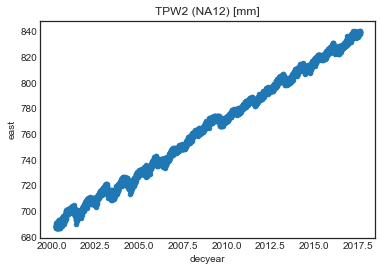

In [33]:
titlestr = '{} ({}) [mm]'.format(station, refframe)
ax = df.plot.scatter('decyear', 'east', title=titlestr)

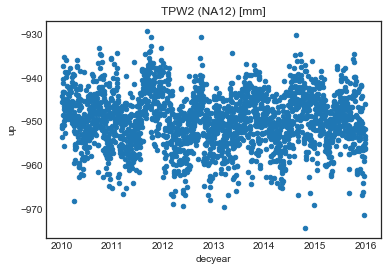

In [34]:
# Particular date range
df['2010/01/01':'2015/12/31'].plot.scatter('decyear', 'up', title=titlestr)

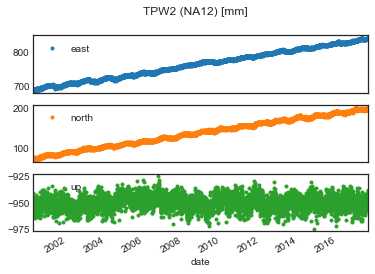

In [35]:
axes = df.plot(y=['east','north','up'], style='.' ,sharex=True, subplots=True, title=titlestr)

# Load station info and steps database

In [147]:
dfs = gps.ungl.load_stations(station=station)

In [148]:
dfs.head()

,site,lat,lon,height,start,end
13873,TPW2,46.2074,-123.7684,-14.973,2000-03-31,2017-01-21


In [78]:
df1,df2= gps.ungl.load_steps(station)

In [79]:
df1.head() #associated with equipment changes

,site,date,code,note
0,TPW2,2007-01-25,1,Receiver_Type_Changed


In [80]:
df2.head() #associated with earthquakes

,site,date,code,thresh_d,distance,mag,id
0,TPW2,1999-07-03,2,125.893,99.846,5.8,gcmtb070399a
1,TPW2,1999-07-03,2,125.893,99.132,5.8,uw10474303
2,TPW2,2001-02-28,2,398.107,131.444,6.8,uw10530748
3,TPW2,2005-06-15,2,630.957,573.980,7.2,usp000dt25
4,TPW2,2012-10-28,2,1258.925,946.127,7.8,usp000juhz


In [81]:
# Want information on one of these earthquakes? insert 'id' into this URL:
# https://earthquake.usgs.gov/earthquakes/eventpage/uw10474303
# https://earthquake.usgs.gov/earthquakes/eventpage/usp000juhz

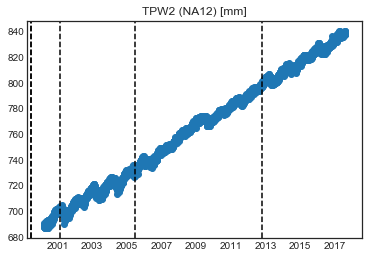

In [82]:
# plot steps with the time series
%matplotlib inline 
#not sure why not working interactively?
plt.scatter(df.index, df.east, label='East')
for i in range(len(df2)):
    plt.axvline(df2.date.iloc[i], color='k', linestyle='dashed', label='nearby EQ')
plt.title(titlestr)
#plt.legend()

# Simple Map showing station location

In [83]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [84]:
def plot_map():
    plot_CRS = ccrs.PlateCarree()
    geodetic_CRS = ccrs.Geodetic()

    # frame station by box of several degrees
    frame=5 #degrees
    x0, y0 = plot_CRS.transform_point(dfs.lon-frame, dfs.lat-frame, geodetic_CRS)
    x1, y1 = plot_CRS.transform_point(dfs.lon+frame, dfs.lat+frame, geodetic_CRS)

    fig,ax = plt.subplots(figsize=(8,8), dpi=100, 
                          subplot_kw=dict(projection=plot_CRS))

    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    ax.plot(dfs.lon, dfs.lat, 'ko',transform=geodetic_CRS)
    ax.text(dfs.lon, dfs.lat, station, fontweight='bold', transform=geodetic_CRS)

    ax.stock_img() # very low-res, but fast!
    ax.coastlines(resolution='50m') #10m is highest res

    states = cfeature.NaturalEarthFeature(scale='50m',
                                     category='cultural',
                                     name='admin_1_states_provinces_lakes')
    ax.add_feature(states, facecolor='none', edgecolor='k',linewidth=0.5)

    gl = ax.gridlines(ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_left = False
    #gl.xlines = False
    #gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

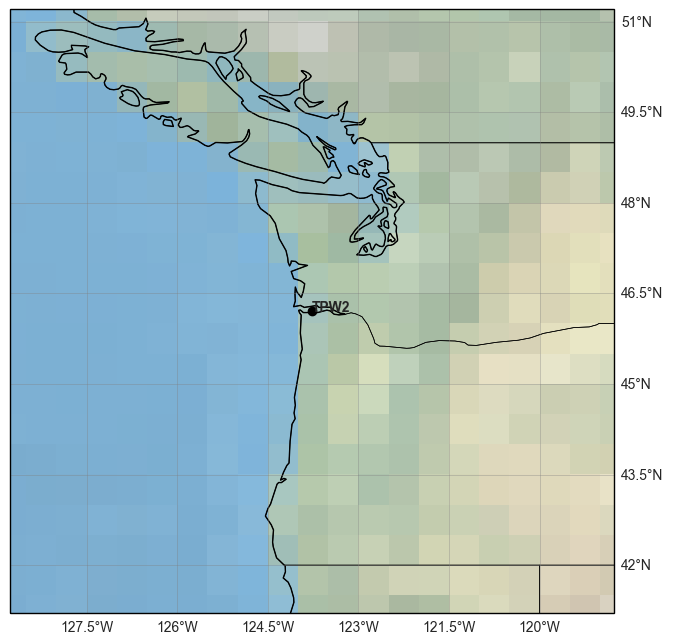

In [85]:
ax = plot_map()

In [149]:
# Find other GPS stations in the vicinity
dfS = gps.ungl.load_stations()
pad = 1 #degree
minlat = dfs.lat.values[0] - pad
maxlat = dfs.lat.values[0] + pad
minlon = dfs.lon.values[0] - pad
maxlon = dfs.lon.values[0] + pad
subset = dfS.query('(@minlat < lat < @maxlat) and (@minlon < lon < @maxlon)')

# Cull to the same time period
# for example, active after 2010, with minimal data gaps?
after = pd.Timestamp('2010-08-01')
subset = subset.query('end > @after')


In [150]:
print('{} stations in the vicinity'.format(len(subset)))
subset.head()

46 stations in the vicinity


,site,lat,lon,height,start,end
1901,CATH,46.1973,-123.3673,56.364,2007-05-04,2015-07-26
2197,CHZZ,45.4865,-123.9781,50.733,1999-10-13,2017-01-21
2409,COB1,45.4858,-122.7974,46.878,2011-12-17,2017-01-19
2635,CROK,46.2746,-122.9125,1.079,2007-05-05,2015-07-26
3848,FTS5,46.2049,-123.9561,-13.712,2008-03-27,2016-08-09


In [88]:
def load_pbo_strainmeters():
    ''' https://www.unavco.org/data/strain-seismic/bsm-data/bsm-data.html '''
    df = pd.read_csv('PBO_bsm_coords.txt', comment='#', names=['id','name','lat','lon','elev'])
    return df

In [156]:
# Get strain meters in area of interest
dfStrain = load_pbo_strainmeters()
dfStrain.head()
dfStrain = dfStrain.query('(@minlat < lat < @maxlat) and (@minlon < lon < @maxlon)')
B022 = dfStrain.query('id == "B022" ')
dfStrain

,id,name,lat,lon,elev
12,B017,flinkm017bwa2007,46.995998,-123.557503,33.9
13,B018,delphi018bor2006,46.979500,-123.020302,10.0
14,B019,waldrf019bwa2008,46.652699,-123.651802,9.0
15,B020,wirkla020bwa2008,46.382702,-123.844498,31.2
16,B022,seaside22bor2006,45.954609,-123.931053,10.0
17,B023,cataln023bor2008,46.111198,-123.078697,177.4
18,B024,kuntza024bor2006,45.637798,-123.855797,37.7
19,B026,roosbc026bor2007,45.309353,-123.823051,232.0


(45, 48)

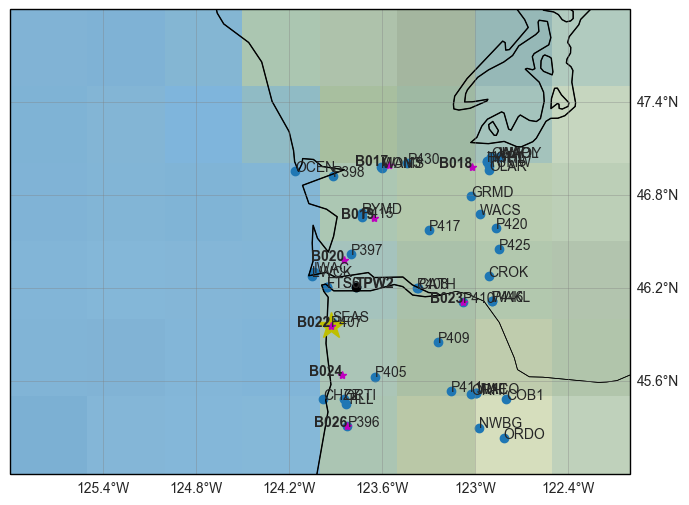

In [154]:
# NOTE: cartopy is smart enough to figure out lon -127 or 227 converntions
ax = plot_map()
ax.scatter(subset.lon, subset.lat,  transform=ccrs.Geodetic())
for i in range(len(subset)):
    ax.text(subset.lon.iloc[i], subset.lat.iloc[i], subset.site.iloc[i], transform=ccrs.Geodetic())

ax.plot(B022.lon, B022.lat, 'y*', ms=20, transform=ccrs.Geodetic())
#ax.text(B022.lon, B022.lat, 'B022', fontweight='bold', transform=ccrs.Geodetic())

#plot and label all strain meters
for i,row in dfStrain.iterrows():
    ax.plot(row.lon, row.lat, 'm*', transform=ccrs.Geodetic())
    ax.text(row.lon, row.lat, row.id, fontweight='bold', ha='right', transform=ccrs.Geodetic())

plt.xlim(-126, -122)
plt.ylim(45,48)

In [49]:
# get distance to these other stations
import geopandas as gpd
from shapely.geometry import Point
geom = subset.apply(lambda row: Point(row.lon, row.lat), axis=1)
gf = gpd.GeoDataFrame(subset, crs="+init=epsg:4326", geometry=geom)
#gf['distance'] = gf.distance(Point(dfs.lon,dfs.lat))
 #NOTE this is in weird degree units. switch to UTM
#EPSG:32610 WGS84 10North

gf = gf.to_crs({'init': 'epsg:32610'})

site = gf.query('site == @station')

gf['distance'] = gf.distance( site.geometry.iloc[0])/1e3 #distance in kilometres
gf.sort_values('distance')

,site,lat,lon,height,start,end,geometry,distance
13873,TPW2,46.2074,236.2316,-14.973,2000-03-31,2017-01-21,POINT (440723.7789708629 5117378.40361983),0.000000
3849,FTS6,46.2052,236.0440,-13.502,2008-03-26,2016-08-09,POINT (426248.9694033101 5117291.174587799),14.475072
3848,FTS5,46.2049,236.0439,-13.712,2008-03-27,2016-08-09,POINT (426240.8533518889 5117257.934443687),14.483427
7794,LWCK,46.2781,235.9462,39.051,2012-02-11,2015-07-26,POINT (418811.7921511991 5125486.677437812),23.364059
5536,IWAC,46.3059,235.9606,-14.174,2007-12-07,2011-11-30,POINT (419961.721123543 5128560.936971465),23.582029
10461,P397,46.4216,236.2008,566.302,2007-03-21,2017-01-21,POINT (438587.8852033702 5141202.168989831),23.919319
12560,SEAS,45.9842,236.0776,-12.049,2008-08-24,2017-01-19,POINT (428556.2081854859 5092705.594333944),27.509949
10472,P408,46.2005,236.6234,35.273,2005-06-30,2017-01-21,POINT (470944.5074574248 5116393.731236944),30.236766
10471,P407,45.9546,236.0690,-13.123,2006-03-01,2017-01-21,POINT (427851.6795206179 5089424.611521271),30.775078
1901,CATH,46.1973,236.6327,56.364,2007-05-04,2015-07-26,POINT (471660.3767644109 5116034.815176642),30.965760


TPW2 already dowloaded... skipping
FTS6 already dowloaded... skipping
FTS6 already dowloaded... skipping
LWCK already dowloaded... skipping
IWAC already dowloaded... skipping
P397 already dowloaded... skipping
SEAS already dowloaded... skipping


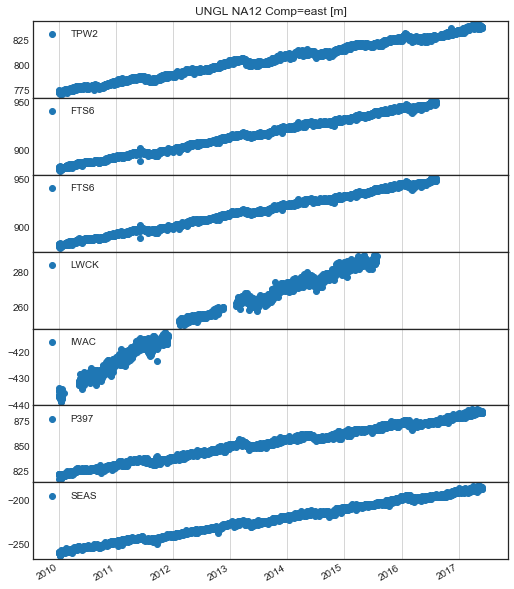

In [50]:
# Make a comparison plot for particular component, list of stations
sites = ['TPW2', 'FTS6', 'FTS6', 'LWCK', 'IWAC', 'P397', 'SEAS'] #less than 30km
comp = 'east'
fig,axes = plt.subplots(len(sites),1, sharex=True, figsize=(8.5,11))
for i,site in enumerate(sites):
    ax = axes[i]
    tenv3 = gps.ungl.download_data(site, refframe, overwrite=False)
    tmp = gps.ungl.load_tenv3(tenv3)
    tmp = tmp['2010/01/01':'2017/06/01']#specific time range
    ax.scatter(tmp.index, tmp[comp],label=site)
    ax.legend(loc='upper left')
    ax.grid(axis='x')

axes[0].set_title('UNGL NA12 Comp={} [m]'.format(comp))
fig.subplots_adjust(hspace=0, wspace=0)
fig.autofmt_xdate()

TPW2 already dowloaded... skipping


/Users/scott/Documents/GitHub/gpstools/analysis.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ints'] = df.index.asi8
/Users/scott/Documents/GitHub/gpstools/analysis.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['elapsed_s'] = (df.ints - df.ints[0])/1e9 #sec


east Rate [mm/yr]=8686.59134090204
RMSE =  1.94147046307
FTS6 already dowloaded... skipping
east Rate [mm/yr]=10191.255575632269

/Users/scott/Documents/GitHub/gpstools/analysis.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['linear_{}'.format(col)] = est.predict(X)
/Users/scott/Documents/GitHub/gpstools/analysis.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['detrend1_{}'.format(col)] = y - est.predict(X)



RMSE =  1.41907425362
FTS6 already dowloaded... skipping
east Rate [mm/yr]=10191.255575632269
RMSE =  1.41907425362
LWCK already dowloaded... skipping
east Rate [mm/yr]=10443.272914965533
RMSE =  1.93159898813
IWAC already dowloaded... skipping
east Rate [mm/yr]=11493.185989532323
RMSE =  1.73050900233
P397 already dowloaded... skipping
east Rate [mm/yr]=8233.42355490106
RMSE =  1.9449967149
SEAS already dowloaded... skipping
east Rate [mm/yr]=9841.14787016422
RMSE =  1.65822122429


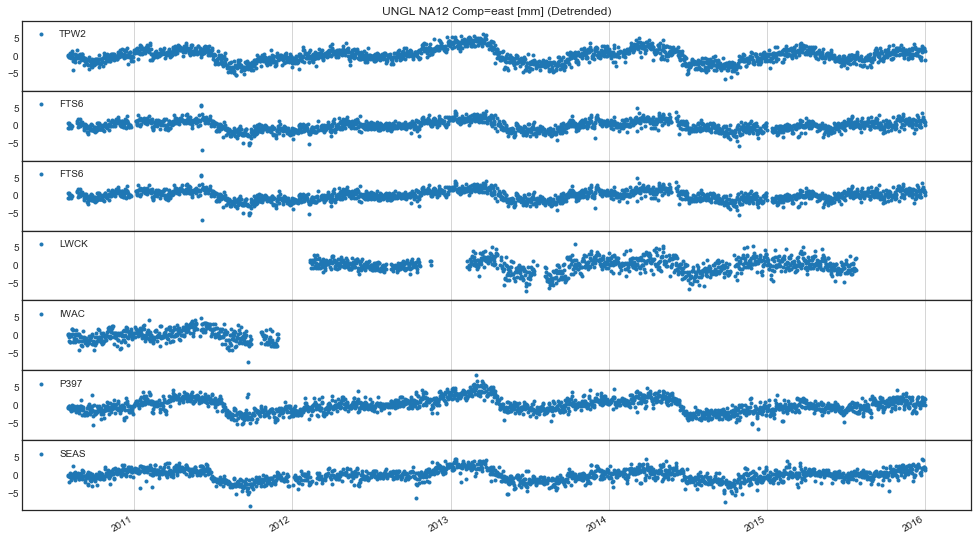

In [25]:
# Same plot, detrend the data
sites = ['TPW2', 'FTS6', 'FTS6', 'LWCK', 'IWAC', 'P397', 'SEAS'] #less than 30km
comp = 'east'
fig,axes = plt.subplots(len(sites),1, sharex=True, sharey=True, figsize=(17,10))
for i,site in enumerate(sites):
    ax = axes[i]
    tenv3 = gps.ungl.download_data(site, refframe, overwrite=False)
    tmp = gps.ungl.load_tenv3(tenv3)
    #tmp = tmp['2010/01/01':'2017/06/01']#specific time range
    tmp = gps.analysis.do_detrend(tmp, comp, start='2010/08/01', end='2016/01/01')
    ax.scatter(tmp.index, tmp['detrend1_'+comp],marker='.',label=site)
    ax.legend(loc='upper left')
    ax.grid(axis='x')

axes[0].set_title('UNGL NA12 Comp={} [mm] (Detrended)'.format(comp))
fig.subplots_adjust(hspace=0, wspace=0)
fig.autofmt_xdate()

#plt.ylim(-10,10)

# Fit velocity to timeseries

In [26]:
dfF = gps.analysis.fit_linear(df)

In [27]:
# Table of values
for comp in ['east','north','up']:
    x = df.decyear
    y = df[comp]
    z,cov = np.polyfit(x, y, 1, cov=True)
    p = np.poly1d(z)
    #print(p)
    stderr = 2*np.sqrt(np.diag(cov))
    print('{}: {:.2f} +/- {:.2f} mm/yr'.format(comp, z[0], stderr[0]))
    residuals = (p(x) - y)
    rmse = np.sqrt((np.sum(residuals**2) / residuals.size))
    print('rmse = {:.2f}'.format(rmse))

east: 8.64 +/- 0.01 mm/yr
rmse = 2.67
north: 7.02 +/- 0.01 mm/yr
rmse = 2.30
up: 0.06 +/- 0.03 mm/yr
rmse = 6.26


In [28]:
# Load MIDAS information
dfm = gps.ungl.load_midas(station, refframe)

In [29]:
#%qtconsole
dfm

,site,version,start,end,years,epochs,epochs_good,pairs,east,north,...,e0,n0,u0,out_e,out_n,out_u,sig_e,sig_n,sig_u,nsteps
5838,TPW2,MIDAS4,2000.2464,2017.5359,17.2895,6256,5781,8958,8.387,7.084,...,4.275,3.091,-7.793,0.016,0.056,0.045,3.364,1.973,8.029,4


In [30]:
print('MIDAS')
print('east: {:.2f} +/- {:.2f} mm/yr'.format(dfm.east.values[0], dfm.err_e.values[0]))
print('north: {:.2f} +/- {:.2f} mm/yr'.format(dfm.north.values[0], dfm.err_n.values[0]))
print('up: {:.2f} +/- {:.2f} mm/yr'.format(dfm.up.values[0], dfm.err_u.values[0]))

MIDAS
east: 8.39 +/- 0.27 mm/yr
north: 7.08 +/- 0.16 mm/yr
up: 0.36 +/- 0.65 mm/yr


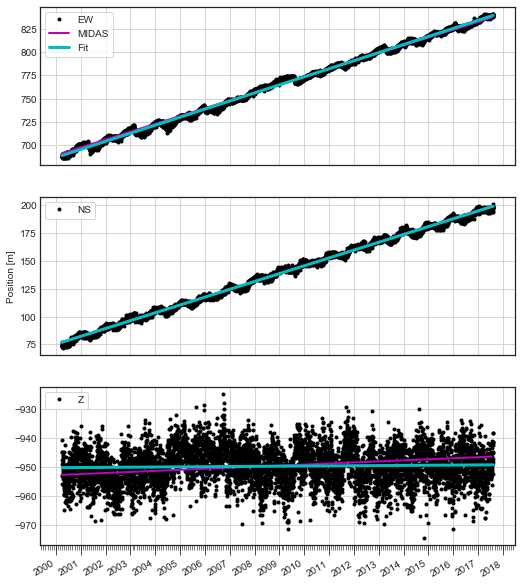

In [31]:
dfM = gps.ungl.add_midas(df, dfm)
gps.plot.all(df,dfFit=dfF, dfMidas=dfM)

# Compare to ETS catalogs

(733773.0, 736481.0)

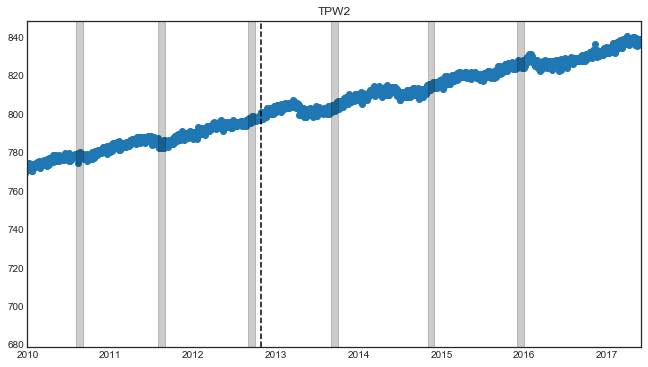

In [32]:
# Compare to database of ETS events:
# https://pnsn.org/tremor/overview
#p1 = pd.Period('2010-08')
#p1.start_time
#p1.end_time
#list of periods of interest from figure 3.3
ets = [pd.Period('2010-08'), 
       pd.Period('2011-08'), 
       pd.Period('2012-09'), 
       pd.Period('2013-09'),
       pd.Period('2014-11'),
       pd.Period('2015-12')]

fig,ax = plt.subplots(figsize=(11,6))
#not sure why not working interactively?
plt.scatter(df.index, df.east, label='East')
for i in range(len(df2)):
    plt.axvline(df2.date.iloc[i], color='k', linestyle='dashed', label='nearby EQ')


for p in ets:
    plt.axvspan(p.start_time, p.end_time, color='k', alpha=0.2)
plt.title(station)
#plt.legend()

plt.xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2017-06-01'))